<h1 align="center">📊 HR Employee Attrition Analysis</h1>
<h3 align="center">End-to-End Data Science & Machine Learning Project</h3>

----------------------------------------------------------------------------------------------------------------------------------------------------------

In [72]:
# importing pythons library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

----------------------------------------------------------------------------------------------------------------------------------------------------------

##### **Introduction**
*Employee Attrition: Causes, Consequences, and SolutionsEmployee attrition means the natural reduction inworkforce size as employees leave due to resignation, retirement, or other reasons, often without immediate replacement, signifying a gradual decrease in headcount that HR tracks using metrics like the attrition rate to understand turnover and stability, identifying issues like poor management or lack of growth..*

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [46]:
# importing the dataset , On which we going to work ..
Emp = pd.read_csv("HR-Employee-Attrition.csv")
Emp.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


--------------------------------------------------------------------------------------------------------------------------------------------------------

In [73]:
# Rows and columns
Emp.shape

(1470, 36)

In [74]:
# statsical of the dataset
Emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [75]:
# infromation about the dataset - columns , null , dtype ....etc
Emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [76]:
# checking null values
Emp.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [78]:
# checking duplicated values
Emp.duplicated().sum()

0

In [8]:
# let , Understand it theory wise..


# Q1. How many employees are there in the company?

In [9]:
Emp.shape[0]

1470

# Q2. How many employees left the company?

In [10]:
Emp[Emp['Attrition'] == 'Yes'].shape[0]

237

# Q3. How many employees are currently working?

In [11]:
Emp[Emp['Attrition'] == 'No'].shape[0]

1233

# Q4. What is the attrition rate (%)?

In [12]:
attrition_rate = (Emp['Attrition'].value_counts(normalize=True) * 100)
attrition_rate

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

# Q5. How many male and female employees are there?

In [13]:
Emp['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

# Q6. Which gender has higher attrition?

In [14]:
pd.crosstab(Emp['Gender'], Emp['Attrition'])

Attrition,No,Yes
Gender,,
Female,501,87
Male,732,150


# Q7. What is the average age of employees?

In [15]:
Emp['Age'].mean()

36.923809523809524

# Q8. What is the average age of employees who left?

In [17]:
Emp[Emp['Attrition'] == 'Yes']['Age'].mean()

33.607594936708864

# Q9. Which department has the highest attrition?

In [18]:
pd.crosstab(Emp['Department'], Emp['Attrition'], normalize='index') * 100

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


# Q10. Which job role has the highest attrition count?

In [19]:
Emp[Emp['Attrition'] == 'Yes']['JobRole'].value_counts()

JobRole
Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: count, dtype: int64

# Q11. Do employees working overtime leave more?

In [20]:
pd.crosstab(Emp['OverTime'],Emp['Attrition'], normalize='index') * 100

Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


# Q12. What is the average monthly income of employees?

In [21]:
Emp['MonthlyIncome'].mean()

6502.931292517007

# Q13. What is the average income of employees who left?

In [22]:
Emp[Emp['Attrition'] == 'Yes']['MonthlyIncome'].mean()

4787.0928270042195

# Q14. Which salary range has highest attrition?

In [80]:
Emp['IncomeGroup'] = pd.cut(Emp['MonthlyIncome'],bins=[0,3000,6000,10000,20000],labels=['Low','Medium','High','Very High'])
pd.crosstab(Emp['IncomeGroup'],Emp['Attrition'])

Attrition,No,Yes
IncomeGroup,,
Low,282,113
Medium,453,66
High,242,33
Very High,256,25


# Q15. How many employees have worked more than 5 years?

In [24]:
Emp[Emp['YearsAtCompany'] > 5].shape[0]

694

# Q16. Do new employees leave more often?

In [25]:
pd.crosstab(Emp['YearsAtCompany'],Emp['Attrition']).head()

Attrition,No,Yes
YearsAtCompany,,
0,28,16
1,112,59
2,100,27
3,108,20
4,91,19


# Q17. What is the average job satisfaction of employees who left?

In [26]:
Emp[Emp['Attrition'] == 'Yes']['JobSatisfaction'].mean()

2.4683544303797467

# Q18. Which education field has highest attrition?

In [27]:
Emp[Emp['Attrition'] == 'Yes']['EducationField'].value_counts()

EducationField
Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: count, dtype: int64

# Q19. What is the average distance from home for employees who left?

In [28]:
Emp[Emp['Attrition'] == 'Yes']['DistanceFromHome'].mean()

10.632911392405063

# Q20. Which age group shows highest attrition?

In [81]:
Emp['AgeGroup'] = pd.cut(Emp['Age'],bins=[18,25,35,45,60],labels=['18-25','26-35','36-45','46-60'])
pd.crosstab(Emp['AgeGroup'],Emp['Attrition'])

Attrition,No,Yes
AgeGroup,,
18-25,75,40
26-35,490,116
36-45,425,43
46-60,239,34


**These questions were derived directly from the dataset using Pandas analysis to understand employee distribution, attrition behavior, and HR risk patterns.**

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Experimental Analysis*

In [67]:
# Attrition vs New Joiners
Emp['NewJoiner'] = Emp['YearsAtCompany'] <= 1
pd.crosstab(Emp['NewJoiner'],Emp['Attrition'], normalize='index')

Attrition,No,Yes
NewJoiner,,
False,0.870916,0.129084
True,0.651163,0.348837


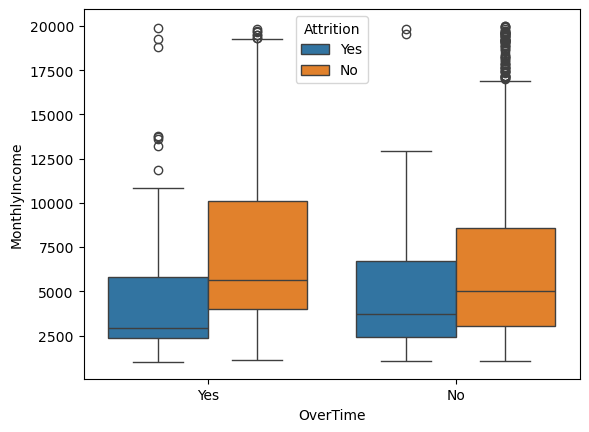

In [68]:
# Overtime + Income Interaction
sns.boxplot(x='OverTime', y='MonthlyIncome', hue='Attrition', data=Emp)
plt.show()

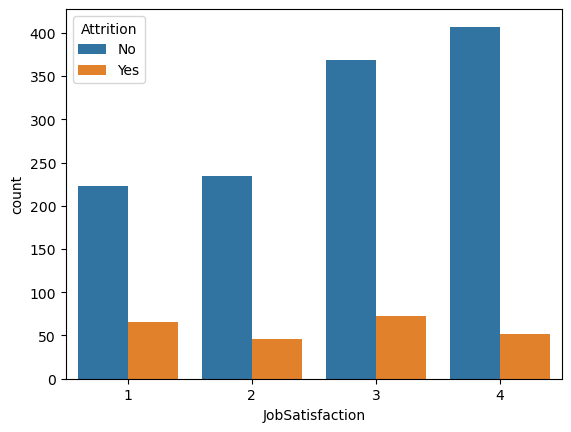

In [69]:
# Satisfaction Score Impact
sns.countplot(x='JobSatisfaction', hue='Attrition', data=Emp)
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Target Variable Analysis*

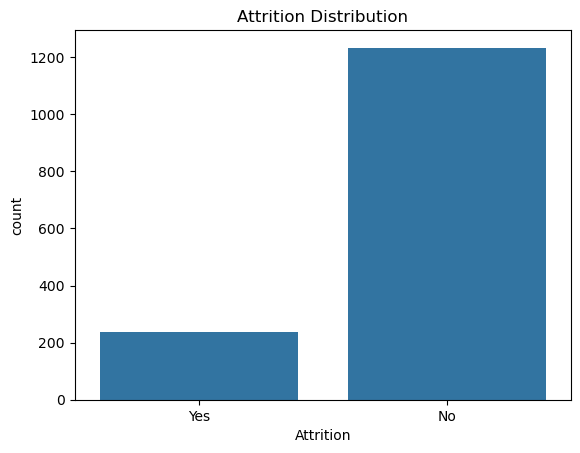

In [8]:
Emp['Attrition'].value_counts()
sns.countplot(x='Attrition', data=Emp)
plt.title('Attrition Distribution')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Univariate Analysis (Numerical Features)*

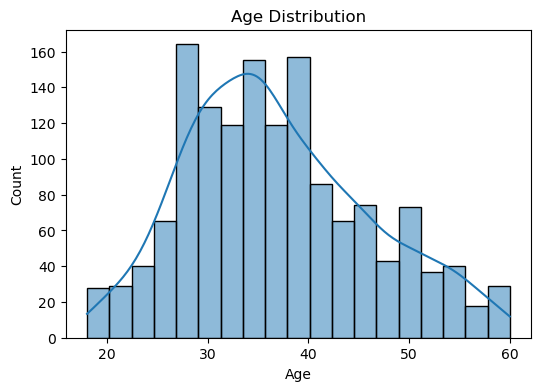

In [9]:
# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(Emp['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

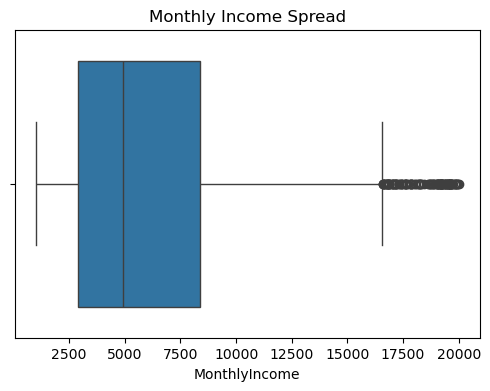

In [10]:
# Montly Income
plt.figure(figsize=(6,4))
sns.boxplot(x=Emp['MonthlyIncome'])
plt.title('Monthly Income Spread')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Bivariate Analysis*

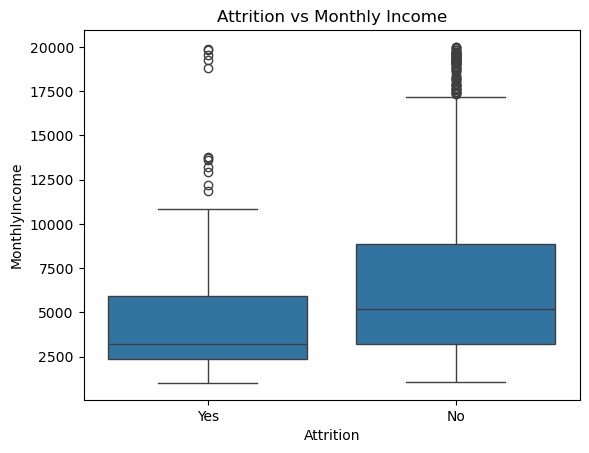

In [11]:
# Attrition vs Monthly Income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=Emp)
plt.title('Attrition vs Monthly Income')
plt.show()

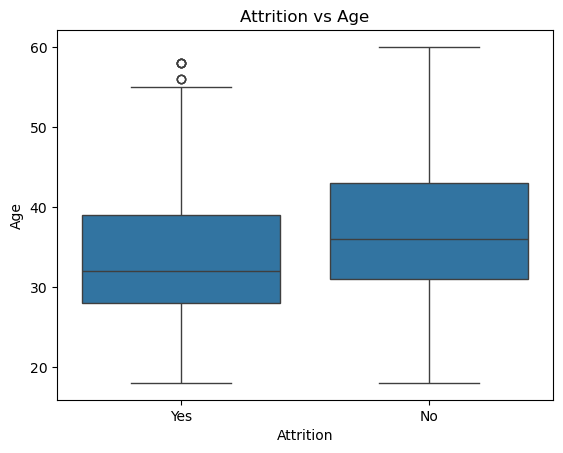

In [12]:
# Attrition vs Age
sns.boxplot(x='Attrition', y='Age', data=Emp)
plt.title('Attrition vs Age')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Categorical Feature Analysis*

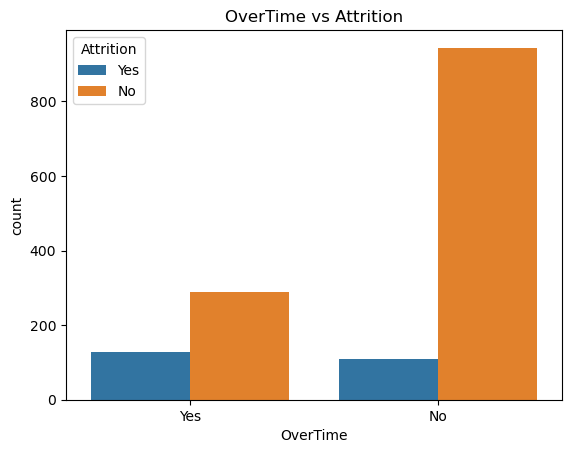

In [13]:
# Attrition vs OverTime
sns.countplot(x='OverTime', hue='Attrition', data=Emp)
plt.title('OverTime vs Attrition')
plt.show()

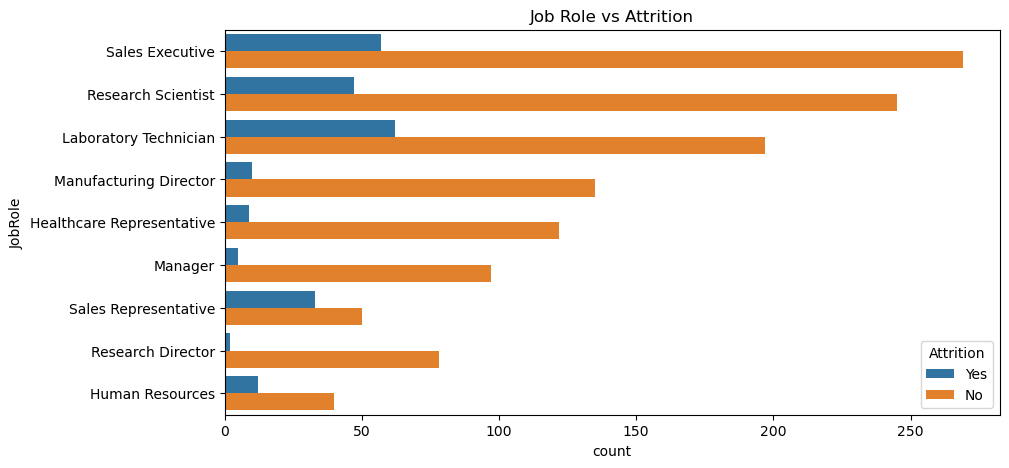

In [14]:
# Attrition vs Job Role
plt.figure(figsize=(10,5))
sns.countplot(y='JobRole', hue='Attrition', data=Emp)
plt.title('Job Role vs Attrition')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Correlation Analysis*

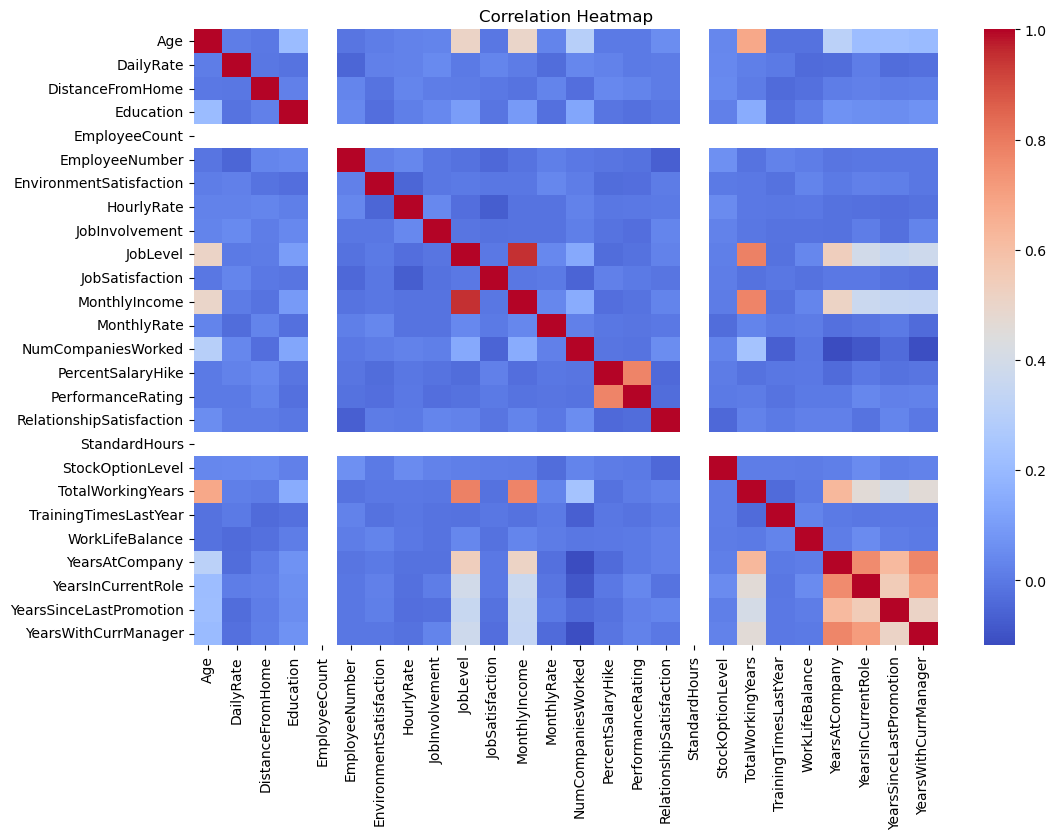

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(Emp.corr(numeric_only=True), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Advanced Analysis*

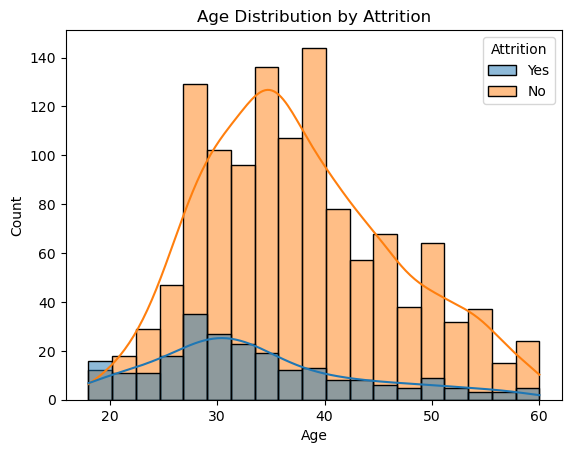

In [58]:
# Distribution per Attrition
sns.histplot(data=Emp, x='Age', hue='Attrition', kde=True)
plt.title("Age Distribution by Attrition")
plt.show()

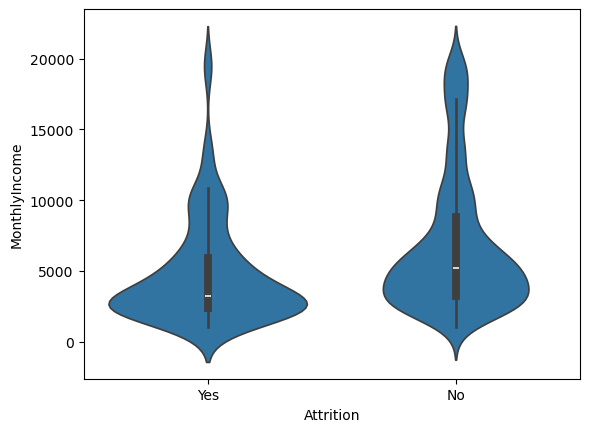

In [60]:
# Violin Plot
sns.violinplot(x='Attrition', y='MonthlyIncome', data=Emp)
plt.show()

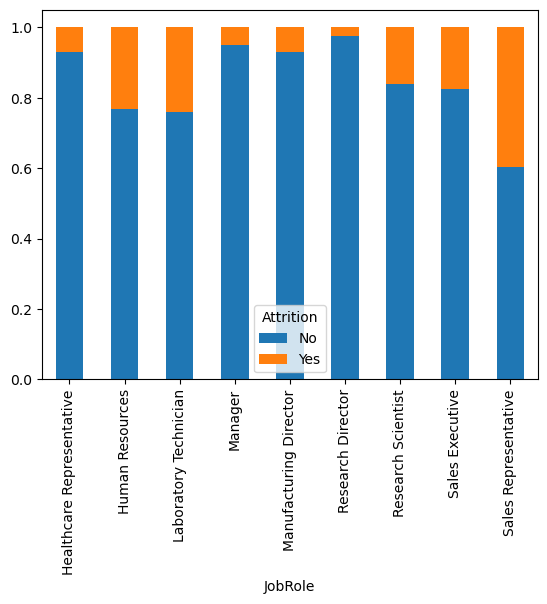

In [62]:
# Stacked Bar Chart
pd.crosstab(Emp['JobRole'], Emp['Attrition'], normalize='index').plot(kind='bar', stacked=True)
plt.show()

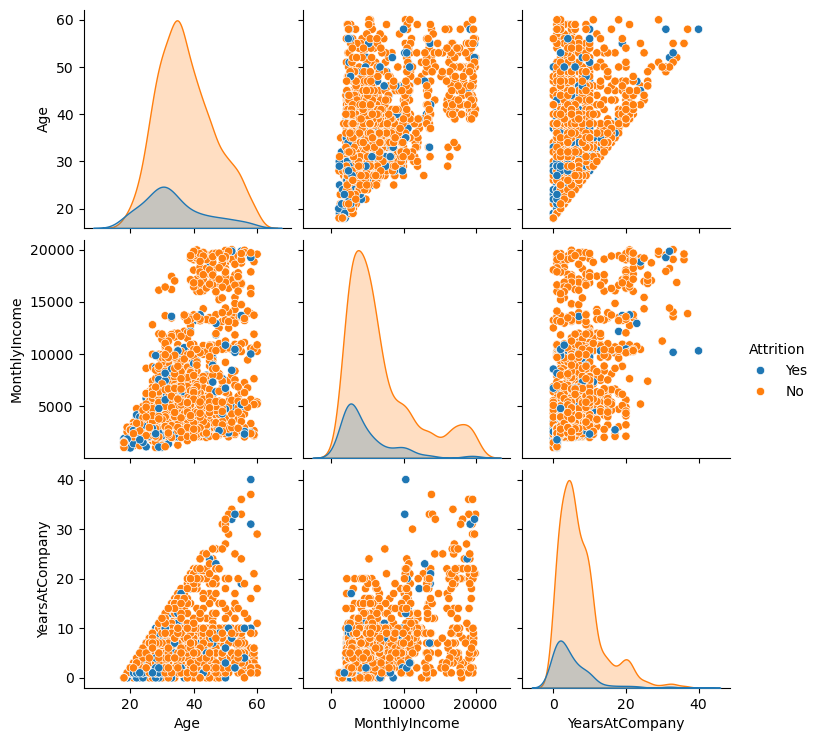

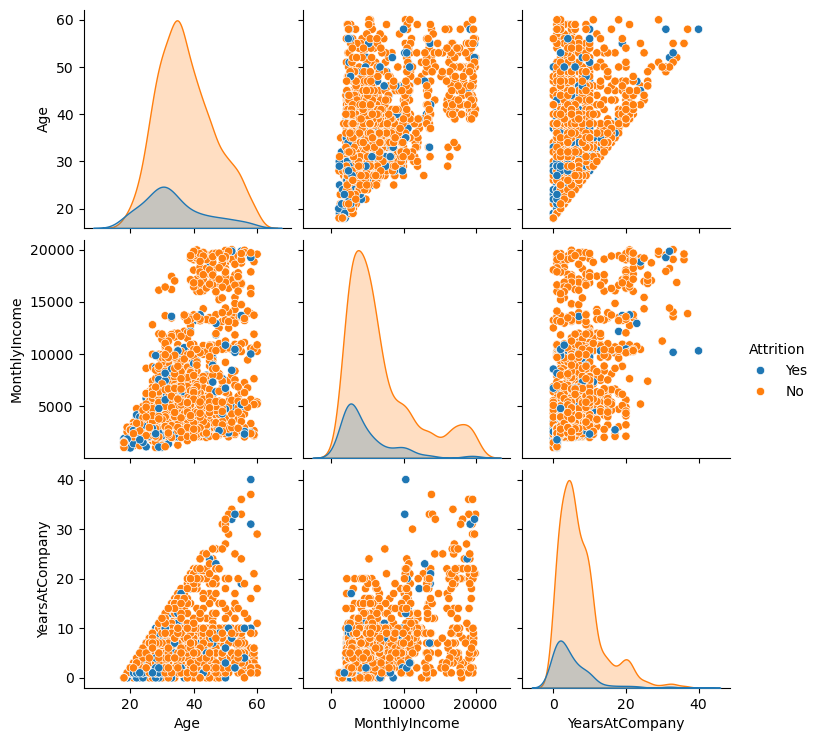

In [65]:
# Pairplot
sns.pairplot(Emp[['Age','MonthlyIncome','YearsAtCompany','Attrition']], hue='Attrition')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Data Preprocessing*

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

> *Encode Target Variable*

In [17]:
Emp['Attrition'] = Emp['Attrition'].map({'Yes':1, 'No':0})

--------------------------------------------------------------------------------------------------------------------------------------------------------

> *Feature & Target Split*

In [18]:
X = Emp.drop('Attrition', axis=1)
y = Emp['Attrition']

--------------------------------------------------------------------------------------------------------------------------------------------------------

> *Identify Column Types*

In [19]:
numerical_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Pipeline & ColumnTransformer*

In [20]:
num_pipeline = Pipeline([('scaler', StandardScaler())])
cat_pipeline = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([('num', num_pipeline, numerical_features),('cat', cat_pipeline, categorical_features)])

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Train-Test Split*

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Logistic Regression Model*

In [22]:
log_model = Pipeline([('preprocessor', preprocessor),('classifier', LogisticRegression(max_iter=1000))])
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

--------------------------------------------------------------------------------------------------------------------------------------------------------

> *Evaluation*

In [23]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Confusion Matrix*

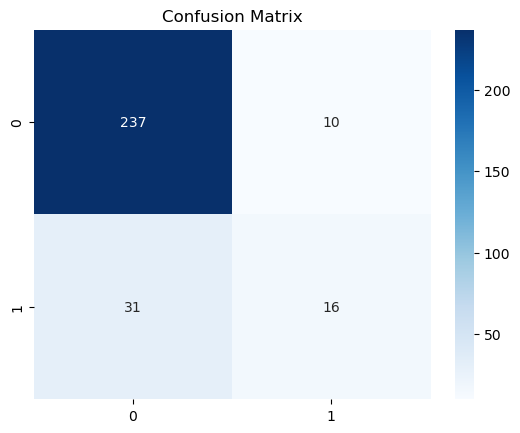

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *ROC Curve*

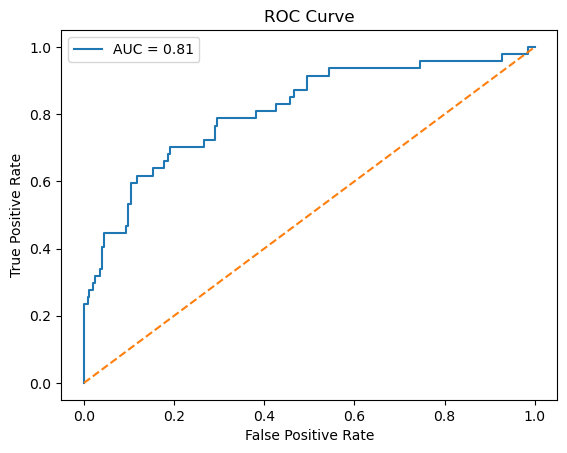

In [25]:
y_prob = log_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Random Forest Model*

In [26]:
rf_model = Pipeline([('preprocessor', preprocessor),('classifier', RandomForestClassifier(n_estimators=200, random_state=42))])
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_score(y_test, rf_pred)

0.8469387755102041

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Feature Importance (Random Forest)*

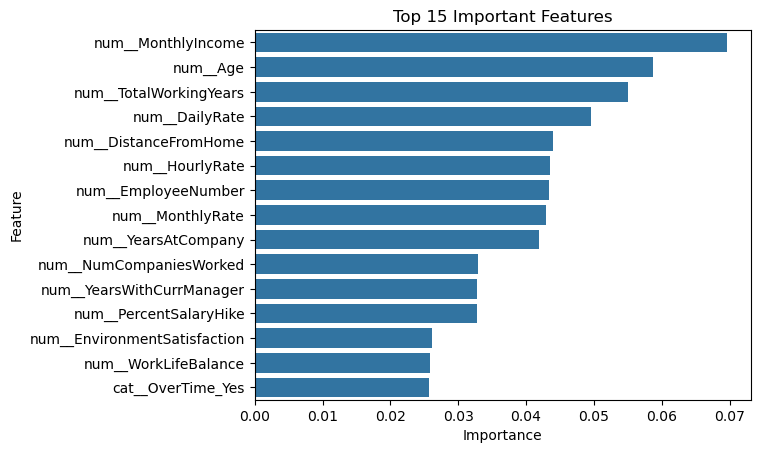

In [27]:
feature_names = rf_model.named_steps['preprocessor'].get_feature_names_out()
importances = rf_model.named_steps['classifier'].feature_importances_
feat_imp = pd.DataFrame({
'Feature': feature_names,
'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Top 15 Important Features')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *Naive Bayes (GaussianNB)*

In [28]:
from sklearn.naive_bayes import GaussianNB 

In [29]:
# Transform features
X_train_nb = preprocessor.fit_transform(X_train)
X_test_nb = preprocessor.transform(X_test)

In [30]:
# Train model
nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train)

GaussianNB()

In [31]:
# Predict
nb_pred = nb_model.predict(X_test_nb)

In [32]:
# Evaluate
accuracy_score(y_test, nb_pred)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       247
           1       0.26      0.66      0.37        47

    accuracy                           0.65       294
   macro avg       0.58      0.65      0.56       294
weighted avg       0.80      0.65      0.69       294



--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *K-Nearest Neighbors (KNN)*

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = Pipeline([('preprocessor', preprocessor),('classifier', KNeighborsClassifier(n_neighbors=7))])
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [34]:
accuracy_score(y_test, knn_pred)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.53       294
weighted avg       0.79      0.84      0.79       294



In [35]:
acc_scores = []

for k in range(3, 15):
    knn = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=k))
    ])
    knn.fit(X_train, y_train)
    acc_scores.append(accuracy_score(y_test, knn.predict(X_test)))

acc_scores


[0.8299319727891157,
 0.8401360544217688,
 0.8299319727891157,
 0.8469387755102041,
 0.8401360544217688,
 0.8435374149659864,
 0.8435374149659864,
 0.8401360544217688,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864,
 0.8435374149659864]

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### *ANN (Artificial Neural Network)*

In [36]:
X_train_ann = preprocessor.fit_transform(X_train)
X_test_ann = preprocessor.transform(X_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

C:\Users\CHIRAG\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [38]:
ann_model = Sequential([Dense(64, activation='relu', input_shape=(X_train_ann.shape[1],)),
    Dropout(0.3),Dense(32, activation='relu'),Dropout(0.2),Dense(1, activation='sigmoid')])

C:\Users\CHIRAG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
ann_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
history = ann_model.fit(
    X_train_ann, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8319 - loss: 0.4840 - val_accuracy: 0.8305 - val_loss: 0.4125
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8404 - loss: 0.4289 - val_accuracy: 0.8305 - val_loss: 0.3820
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8447 - loss: 0.3988 - val_accuracy: 0.8305 - val_loss: 0.3622
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8447 - loss: 0.3806 - val_accuracy: 0.8347 - val_loss: 0.3475
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8532 - loss: 0.3565 - val_accuracy: 0.8432 - val_loss: 0.3373
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8574 - loss: 0.3609 - val_accuracy: 0.8602 - val_loss: 0.3236
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8691 - loss: 0.3300 - val_accuracy: 0.8644 - val_loss: 0.3163
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8691 - loss: 0.3283 - val_accuracy: 0.8856 - va

---

#### *📊 ANN Evaluation*

In [41]:
ann_pred = (ann_model.predict(X_test_ann) > 0.5).astype(int)
accuracy_score(y_test, ann_pred)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


0.8537414965986394

In [42]:
print(classification_report(y_test, ann_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.58      0.32      0.41        47

    accuracy                           0.85       294
   macro avg       0.73      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294



---

#### *📈 ANN Training Curve*

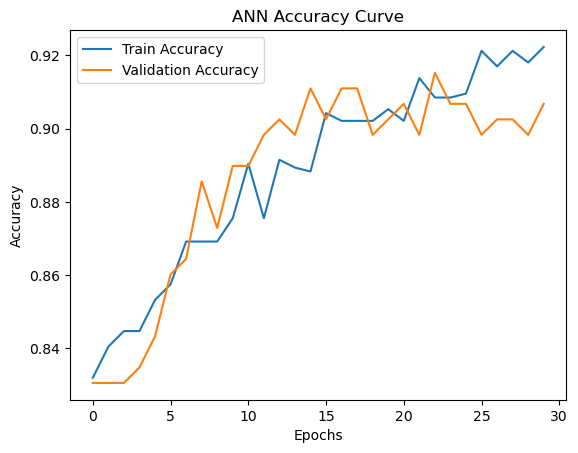

In [43]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---

#### *Model Comparison Table*

In [44]:
model_results = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'ANN'],
    'Accuracy': [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, ann_pred)
    ]
})

model_results


,Model,Accuracy
0,Naive Bayes,0.646259
1,KNN,0.840136
2,ANN,0.853741


**Naive Bayes gives a fast baseline, KNN captures distance-based patterns, and ANN delivers the strongest non-linear predictive performance for employee attrition.**

---

## Business Insights

* Overtime significantly increases attrition risk
* Lower income employees are more likely to leave
* Job satisfaction is a strong retention factor
* Early-tenure employees have higher attrition

---

## Conclusion

This project demonstrated how data science and machine learning can be applied to understand and predict employee attrition. Through extensive EDA, multiple machine learning models, and business interpretation, we identified key drivers of attrition and built predictive solutions that can support HR decision-making.

The analysis highlights the importance of proactive retention strategies and shows how organizations can leverage data to reduce employee turnover and improve workforce stability.


---